![Alt text](womanyellingcat-1573233850.png)

# Building Data Pipeline


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

data_dir = 'PetImages'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(256, 256),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    directory= data_dir,
    target_size=(256, 256),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    subset='validation' 
)


Found 18955 images belonging to 2 classes.
Found 4737 images belonging to 2 classes.


# Model Buildng


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


C:\Users\tanus\AppData\Local\Temp\ipykernel_304\2703971827.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
172/593 [=======>......................] - ETA: 7:05 - loss: 0.7126 - accuracy: 0.5367

C:\Users\tanus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


593/593 [==============================] - 660s 1s/step - loss: 0.6386 - accuracy: 0.6319 - val_loss: 0.5972 - val_accuracy: 0.6456
Epoch 2/10
593/593 [==============================] - 709s 1s/step - loss: 0.5298 - accuracy: 0.7335 - val_loss: 0.4953 - val_accuracy: 0.7634
Epoch 3/10
593/593 [==============================] - 709s 1s/step - loss: 0.4681 - accuracy: 0.7736 - val_loss: 0.4839 - val_accuracy: 0.7640
Epoch 4/10
593/593 [==============================] - 650s 1s/step - loss: 0.4288 - accuracy: 0.8019 - val_loss: 0.4147 - val_accuracy: 0.8121
Epoch 5/10
593/593 [==============================] - 647s 1s/step - loss: 0.3954 - accuracy: 0.8207 - val_loss: 0.4155 - val_accuracy: 0.8035
Epoch 6/10
593/593 [==============================] - 664s 1s/step - loss: 0.3736 - accuracy: 0.8327 - val_loss: 0.3843 - val_accuracy: 0.8244
Epoch 7/10
593/593 [==============================] - 652s 1s/step - loss: 0.3486 - accuracy: 0.8473 - val_loss: 0.3581 - val_accuracy: 0.8425
Epoch 8/10

# Model Evaluation

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(256, 256),
    color_mode='grayscale',  # convert images to grayscale
    batch_size=32,
    class_mode='binary',
    shuffle=False  # do not shuffle the test dataset
)
test_generator = test_datagen.flow_from_directory(
    directory=data_dir,
    target_size=(256, 256),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary'
)

results = model.evaluate_generator(test_generator)
print('Test loss:', results[0])
print('Test accuracy:', results[1])


Found 23692 images belonging to 2 classes.
Found 23692 images belonging to 2 classes.


C:\Users\tanus\AppData\Local\Temp\ipykernel_304\442824029.py:19: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  results = model.evaluate_generator(test_generator)
C:\Users\tanus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Test loss: 0.320513516664505
Test accuracy: 0.8659040927886963


# Saving Model

In [11]:
model.save('/model/dogvcat')

INFO:tensorflow:Assets written to: /model/dogvcat\assets


INFO:tensorflow:Assets written to: /model/dogvcat\assets


# Simple Deployment

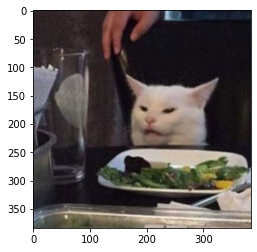

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_path = os.path.join('attitude.png')
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()



In [27]:

model = tf.keras.models.load_model('/model/dogvcat')
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
prediction = model.predict(img_array)
class_label = 'cat' if prediction[0] < 0.5 else 'dog'

print('The image is a', class_label)


1/1 [==============================] - 0s 75ms/step
The image is a cat
